In [5]:
%matplotlib inline
import os
import glob
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import oq_output.hazard_curve_converter as hc
mpl.rcParams['lines.linewidth'] = 2

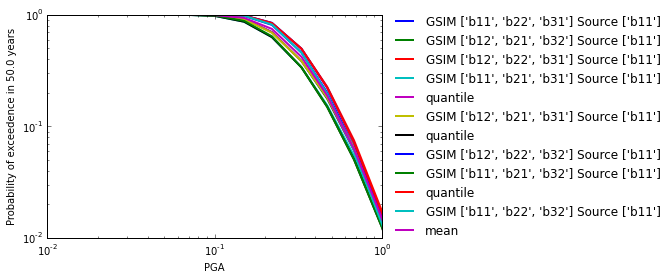

In [6]:
CALCULATION_ID = 39
path = './calc_%d/hazard_curve/PGA/' % CALCULATION_ID
file_wild = '*.xml'

for file_name in glob.glob(path + file_wild):
    hcm = hc.read_hazard_curves(file_name)
    for row in hcm["curves"]:
        if hcm["gsim_tree_path"] is not None:
            label="GSIM %s Source %s" % (hcm["gsim_tree_path"], 
                                         hcm["source_model_tree_path"])
        else:
            label="%s" % (hcm["statistics"])
        plt.loglog(hcm["imls"], row[2:], label=label)
    plt.xlabel(hcm['imt'])
plt.ylabel('Probability of exceedence in %s years' % 
           hcm['investigation_time'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
#plt.autoscale('x', tight=True)
plt.xlim((1e-2, 1))
plt.ylim((1e-2, 1))
plt.show()

In [4]:
hcm

{'curves': array([[  2.82500000e+01,   3.68500000e+01,   1.00000000e+00,
           1.00000000e+00,   1.00000000e+00,   9.99999990e-01,
           9.99996309e-01,   9.99709615e-01,   9.93368844e-01,
           9.38235129e-01,   7.47466053e-01,   4.19806338e-01,
           1.88700904e-01,   6.28194045e-02,   1.48607685e-02,
           2.28295348e-03,   2.33989606e-04,   1.00281180e-05]]),
 'gsim_tree_path': None,
 'imls': array([ 0.01 ,  0.015,  0.022,  0.033,  0.047,  0.068,  0.1  ,  0.15 ,
         0.22 ,  0.33 ,  0.47 ,  0.68 ,  1.   ,  1.5  ,  2.2  ,  3.3  ]),
 'imt': 'PGA',
 'investigation_time': 50.0,
 'source_model_tree_path': None,
 'statistics': 'mean'}